In [104]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format ='retina'

import titanic_tools

In [105]:
traindf = pd.read_csv('train.csv').set_index('PassengerId',)
testdf = pd.read_csv('test.csv').set_index('PassengerId')
df = pd.concat([traindf, testdf], axis=0, sort=False)

In [106]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [107]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df.Title.replace('Ms','Miss')
df['Title'] = df.Title.replace('Mlle','Miss')
df['Title'] = df.Title.replace('Mme','Mrs')
df['Title'] = df.Title.apply(titanic_tools.replace_not_important_with_others)
df.drop('Name',axis=1, inplace=True)

df['Mother'] = np.where((df.Title=='Mrs') & (df.Parch >0), 1, 0)
df['Ticket'] = df.Ticket.apply(titanic_tools.extract_ticket_type)
df['Free'] = np.where(df['Fare']==0, 1,0)
df['FamilySize'] = df.SibSp + df.Parch + 1

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Mother,Free,FamilySize
PassengerId,,,,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,A,7.2500,NaN,S,Mr,0,0,2
2,1.0,1,female,38.0,1,0,PC,71.2833,C85,C,Mrs,0,0,2
3,1.0,3,female,26.0,0,0,SOTON,7.9250,NaN,S,Miss,0,0,1
4,1.0,1,female,35.0,1,0,NO,53.1000,C123,S,Mrs,0,0,2
5,0.0,3,male,35.0,0,0,NO,8.0500,NaN,S,Mr,0,0,1


In [108]:
titanic_tools.counting_values(df, 'FamilySize', 'Survived')

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [109]:
titanic_tools.counting_values(df, 'Mother', 'Survived')

,Mother,Survived
1,1,0.714286
0,0,0.361677


In [110]:
titanic_tools.counting_values(df, 'Title', 'Survived')

,Title,Survived
4,Mrs,0.793651
2,Miss,0.702703
1,Master,0.575000
0,Dr,0.428571
5,Others,0.312500
3,Mr,0.156673


In [111]:
titanic_tools.counting_values(df, 'Embarked', 'Survived')

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [112]:
titanic_tools.counting_values(df, 'Ticket', 'Survived')

,Ticket,Survived
4,PC,0.650000
3,OTHER_TICKET,0.392157
2,NO,0.384266
1,CA,0.355556
5,SOTON,0.277778
6,WC,0.100000
0,A,0.071429


In [113]:
titanic_tools.counting_values(df, 'Free', 'Survived')

,Free,Survived
0,0,0.389269
1,1,0.066667


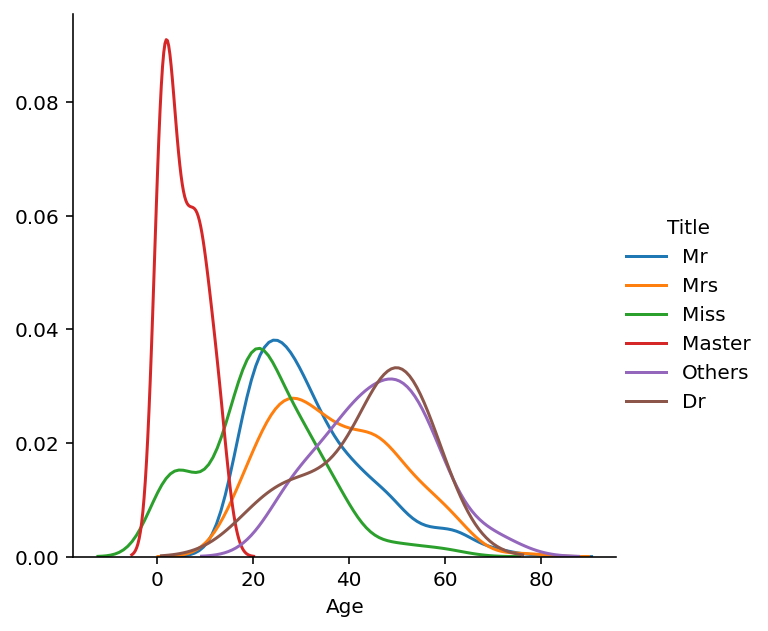

In [114]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
facet = sns.FacetGrid(data = df, hue = "Title", legend_out=True, height = 4.5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

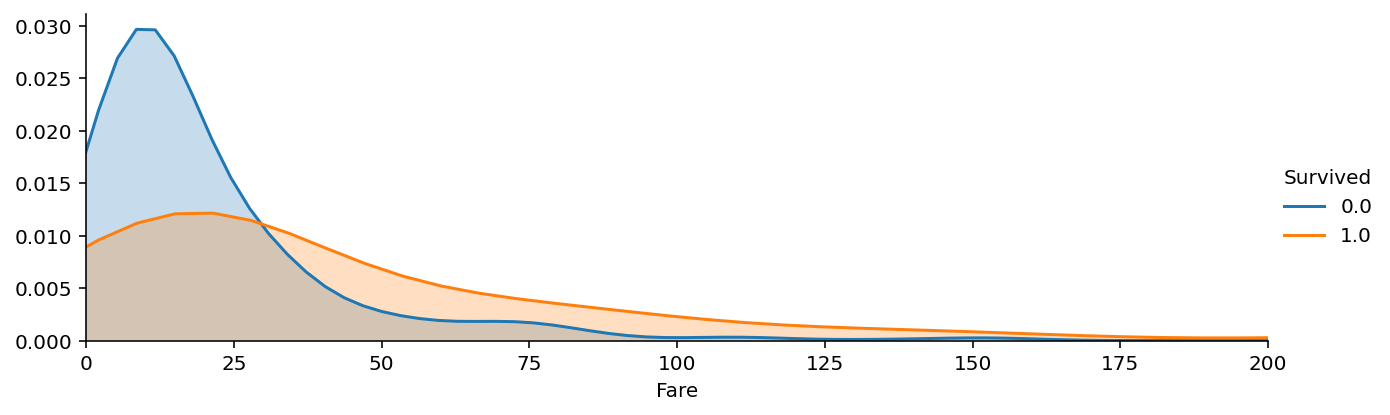

In [125]:
facet = sns.FacetGrid(df, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend();

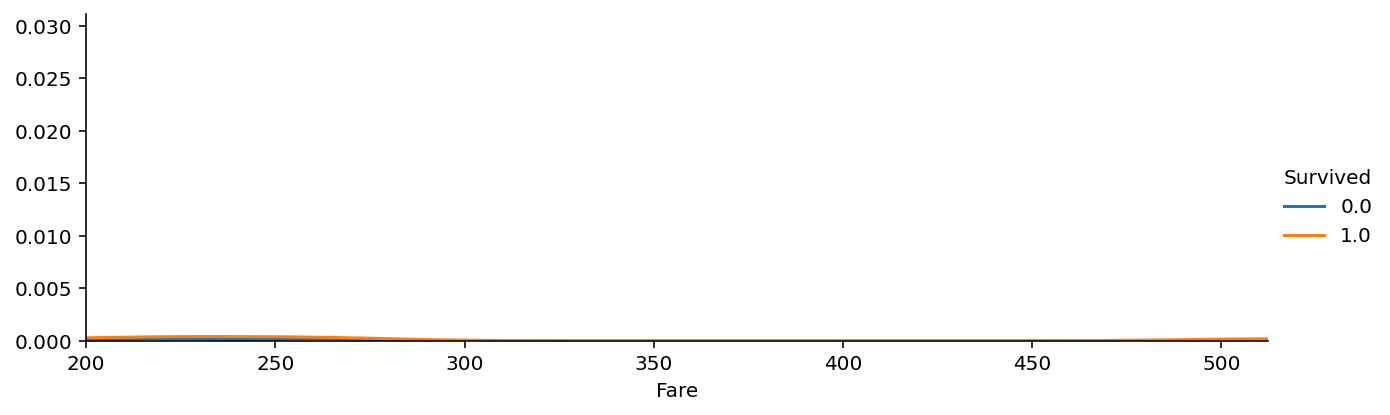

In [127]:
facet = sns.FacetGrid(df, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(200, df['Fare'].max()))
facet.add_legend();

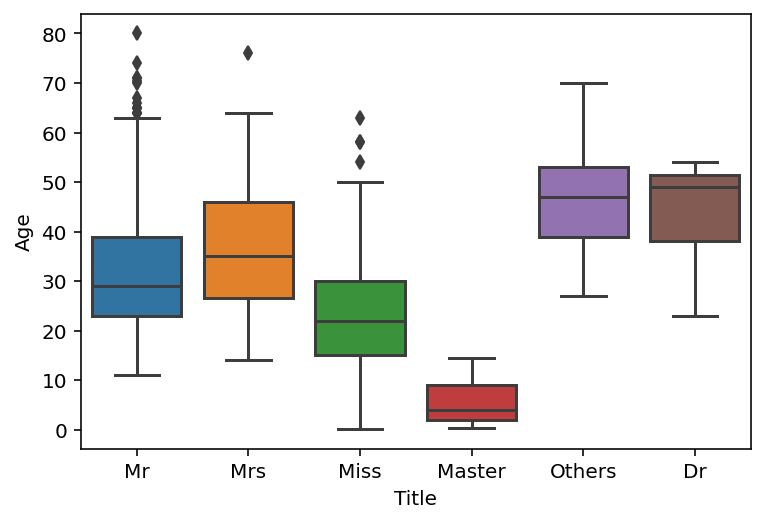

In [116]:
sns.boxplot(data = df, x = "Title", y = "Age");

In [117]:
df.groupby(df.Title).Age.mean()

Title
Dr        43.571429
Master     5.482642
Miss      21.824366
Mr        32.252151
Mrs       36.918129
Others    45.714286
Name: Age, dtype: float64

In [118]:
df[df.Fare.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Mother,Free,FamilySize
PassengerId,,,,,,,,,,,,,,
1044,NaN,3,male,60.5,0,0,NO,NaN,NaN,S,Mr,0,0,1


In [119]:
df.groupby(df.Pclass).Fare.mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

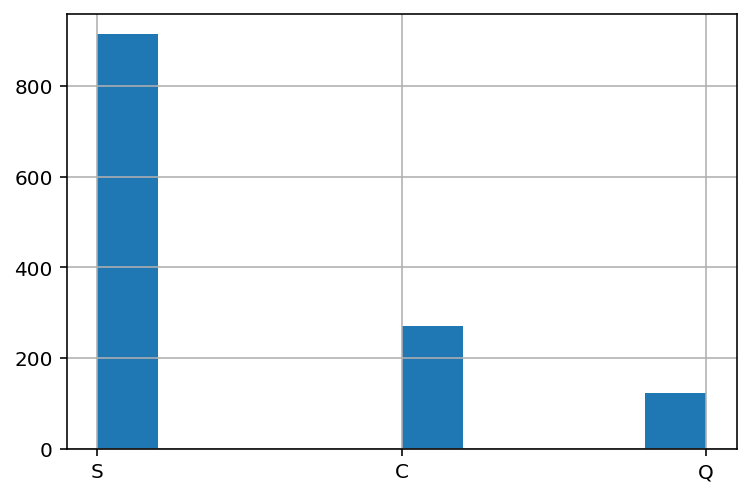

In [120]:
df.Embarked.hist();

In [121]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Mother,Free,FamilySize
PassengerId,,,,,,,,,,,,,,
62,1.0,1,female,38.0,0,0,NO,80.0,B28,NaN,Miss,0,0,1
830,1.0,1,female,62.0,0,0,NO,80.0,B28,NaN,Mrs,0,0,1


In [122]:
df.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Mother,Free,FamilySize
PassengerId,,,,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,A,7.2500,NaN,S,Mr,0,0,2
2,1.0,1,female,38.0,1,0,PC,71.2833,C85,C,Mrs,0,0,2
3,1.0,3,female,26.0,0,0,SOTON,7.9250,NaN,S,Miss,0,0,1
4,1.0,1,female,35.0,1,0,NO,53.1000,C123,S,Mrs,0,0,2
5,0.0,3,male,35.0,0,0,NO,8.0500,NaN,S,Mr,0,0,1
6,0.0,3,male,NaN,0,0,NO,8.4583,NaN,Q,Mr,0,0,1
7,0.0,1,male,54.0,0,0,NO,51.8625,E46,S,Mr,0,0,1
8,0.0,3,male,2.0,3,1,NO,21.0750,NaN,S,Master,0,0,5
9,1.0,3,female,27.0,0,2,NO,11.1333,NaN,S,Mrs,1,0,3


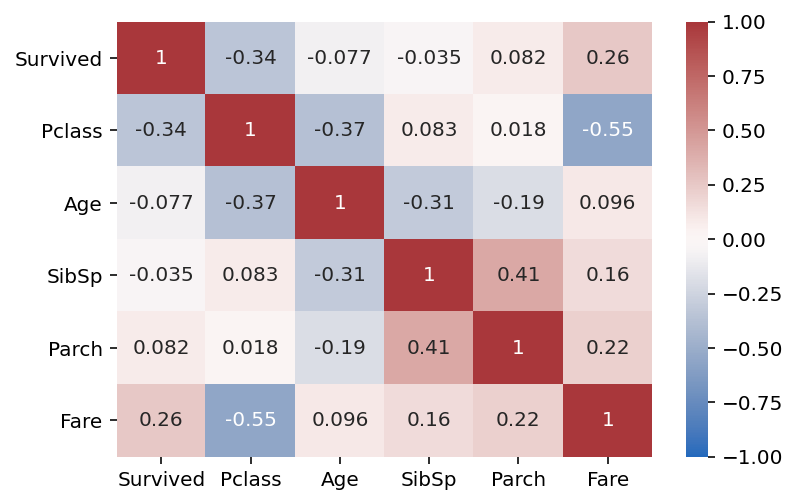

In [123]:
sns.heatmap(traindf.corr(),center=0,vmin=-1, vmax=1,cmap='vlag', annot=True);